In [1]:
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
url = 'https://data.nasdaq.com/api/v3/datatables/ZILLOW/DATA?indicator_id=ZSFH&region_id=394913&api_key=nhngZKzAkdnohAMb46Kx'
response = requests.get(url)
data = response.json()

if response.status_code == 200:
    # Convert response to JSON format
    data = response.json()
    
    # Extract relevant data
    zillow_data = data['datatable']['data']
    column_names = [column['name'] for column in data['datatable']['columns']]
    
    # Create DataFrame
    nyc_df = pd.DataFrame(zillow_data, columns=column_names)

In [3]:
url = 'https://data.nasdaq.com/api/v3/datatables/ZILLOW/DATA?indicator_id=ZSFH&region_id=394463&api_key=nhngZKzAkdnohAMb46Kx'
response = requests.get(url)
data = response.json()
if response.status_code == 200:
    # Convert response to JSON format
    data = response.json()
    
    # Extract relevant data
    zillow_data = data['datatable']['data']
    column_names = [column['name'] for column in data['datatable']['columns']]
    
    # Create DataFrame
    chicago_df = pd.DataFrame(zillow_data, columns=column_names)

In [4]:
url = 'https://data.nasdaq.com/api/v3/datatables/ZILLOW/DATA?indicator_id=ZSFH&region_id=753899&api_key=nhngZKzAkdnohAMb46Kx'
response = requests.get(url)
data = response.json()
if response.status_code == 200:
    # Convert response to JSON format
    data = response.json()
    
    # Extract relevant data
    zillow_data = data['datatable']['data']
    column_names = [column['name'] for column in data['datatable']['columns']]
    
    # Create DataFrame
    la_df = pd.DataFrame(zillow_data, columns=column_names)

In [5]:
url = 'https://data.nasdaq.com/api/v3/datatables/ZILLOW/DATA?indicator_id=ZSFH&region_id=395078&api_key=nhngZKzAkdnohAMb46Kx'
response = requests.get(url)
data = response.json()
if response.status_code == 200:
    # Convert response to JSON format
    data = response.json()
    
    # Extract relevant data
    zillow_data = data['datatable']['data']
    column_names = [column['name'] for column in data['datatable']['columns']]
    
    # Create DataFrame
    seattle_df = pd.DataFrame(zillow_data, columns=column_names)

In [6]:
url = 'https://data.nasdaq.com/api/v3/datatables/ZILLOW/DATA?indicator_id=ZSFH&region_id=394514&api_key=nhngZKzAkdnohAMb46Kx'
response = requests.get(url)
data = response.json()
if response.status_code == 200:
    # Convert response to JSON format
    data = response.json()
    
    # Extract relevant data
    zillow_data = data['datatable']['data']
    column_names = [column['name'] for column in data['datatable']['columns']]
    
    # Create DataFrame
    dallas_df = pd.DataFrame(zillow_data, columns=column_names)

In [7]:
pd.set_option('display.float_format', '{:.2f}'.format)

In [8]:
combined_df = pd.concat([chicago_df, nyc_df, la_df, seattle_df, dallas_df], ignore_index=True)

In [9]:
combined_df['date'] = pd.to_datetime(combined_df['date'])
combined_df

,indicator_id,region_id,date,value
0,ZSFH,394463,2024-03-31,328937.60
1,ZSFH,394463,2024-02-29,326275.12
2,ZSFH,394463,2024-01-31,324662.19
3,ZSFH,394463,2023-12-31,323830.97
4,ZSFH,394463,2023-11-30,323073.42
...,...,...,...,...
1690,ZSFH,394514,1996-05-31,113060.00
1691,ZSFH,394514,1996-04-30,112720.00
1692,ZSFH,394514,1996-03-31,112402.00
1693,ZSFH,394514,1996-02-29,112242.00


In [10]:
data = {
    'region_id': [394463, 394514, 395078, 753899, 394913],
    'city': ['Chicago', 'Dallas', 'Seattle', 'Los Angeles', 'NYC']
}
df = pd.DataFrame(data)
df

,region_id,city
0,394463,Chicago
1,394514,Dallas
2,395078,Seattle
3,753899,Los Angeles
4,394913,NYC


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   region_id  5 non-null      int64 
 1   city       5 non-null      object
dtypes: int64(1), object(1)
memory usage: 208.0+ bytes


In [12]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1695 entries, 0 to 1694
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   indicator_id  1695 non-null   object        
 1   region_id     1695 non-null   object        
 2   date          1695 non-null   datetime64[ns]
 3   value         1695 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 53.1+ KB


In [13]:
combined_df["region_id"] = combined_df["region_id"].astype(int)

In [14]:
combined_df = pd.merge(combined_df, df, on="region_id")
combined_df

,indicator_id,region_id,date,value,city
0,ZSFH,394463,2024-03-31,328937.60,Chicago
1,ZSFH,394463,2024-02-29,326275.12,Chicago
2,ZSFH,394463,2024-01-31,324662.19,Chicago
3,ZSFH,394463,2023-12-31,323830.97,Chicago
4,ZSFH,394463,2023-11-30,323073.42,Chicago
...,...,...,...,...,...
1690,ZSFH,394514,1996-05-31,113060.00,Dallas
1691,ZSFH,394514,1996-04-30,112720.00,Dallas
1692,ZSFH,394514,1996-03-31,112402.00,Dallas
1693,ZSFH,394514,1996-02-29,112242.00,Dallas


In [15]:
combined_df['year'] = combined_df['date'].dt.year

/var/folders/5k/_yxk9n810sqfyd87_kzfpfbm0000gn/T/ipykernel_3497/3893297160.py:8: UserWarning: The palette list has more values (6) than needed (5), which may not be intended.
  sns.relplot(
/Users/sam/anaconda3/envs/dev/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/sam/anaconda3/envs/dev/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


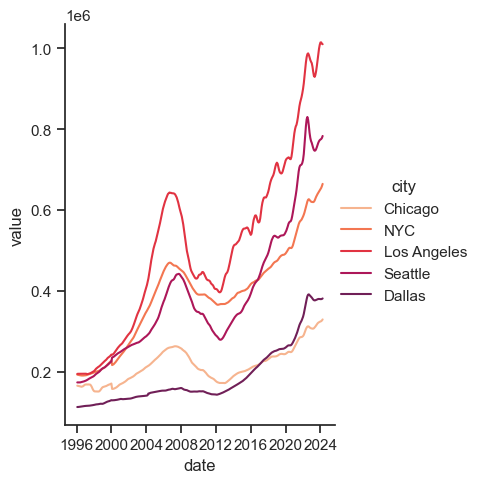

In [16]:
import seaborn as sns
sns.set_theme(style="ticks")

# Define the palette as a list to specify exact values
palette = sns.color_palette("rocket_r")

# Plot the lines on two facets
sns.relplot(
    data=combined_df,
    x="date", y="value",
    hue="city",
    kind="line", palette=palette,
    height=5, aspect=.75, facet_kws=dict(sharex=False),
)

In [17]:
average_data = combined_df.groupby(['city', 'year'])['value'].mean().reset_index()
average_data.head()

,city,year,value
0,Chicago,1996,164324.00
1,Chicago,1997,163806.75
2,Chicago,1998,153246.75
3,Chicago,1999,165807.08
4,Chicago,2000,161329.99


<Axes: xlabel='city', ylabel='year'>

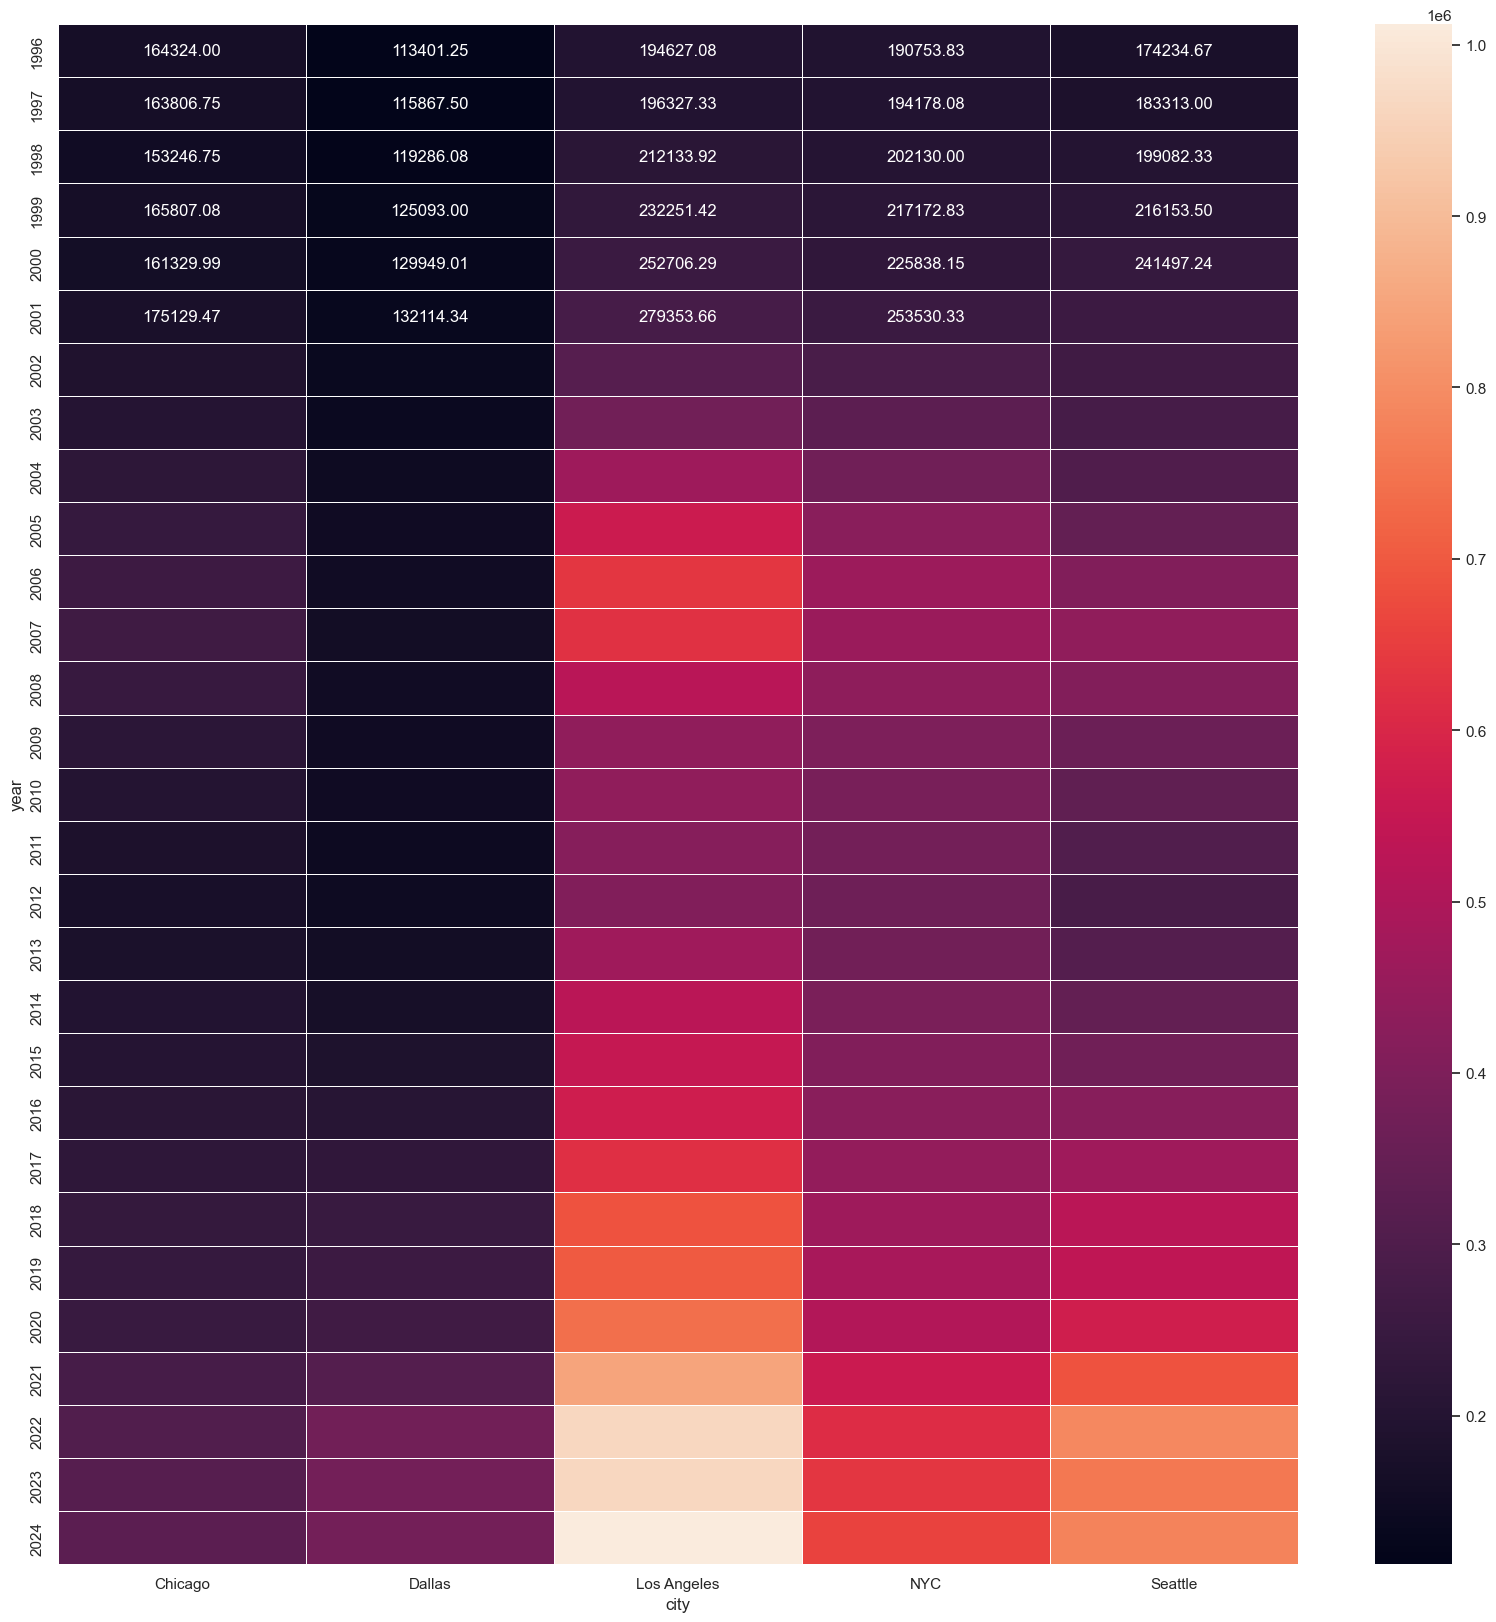

In [92]:
sns.set_theme()

# Load the example flights dataset and convert to long-form
heatmap = (
    average_data
    .pivot(index="year", columns="city", values="value")
)

# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(12,12))
sns.heatmap(heatmap, annot=True, fmt=".2f", linewidths=.5, ax=ax)